# Goal

Playing around to understand subplotting in Python   
Much more detail can be found here  http://jonathansoma.com/lede/data-studio/classes/small-multiples/long-explanation-of-using-plt-subplots-to-create-small-multiples/

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('/Users/spurushe/Downloads/Life_Expectancy_Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [19]:
a = df.Country == 'Afghanistan'
i = df.Country =='India'

## Need to pass the <font color = 'red'>ax</font> object both plots
Remember to add the label property as well.

Text(0.5, 1.0, 'Afghanistan and India')

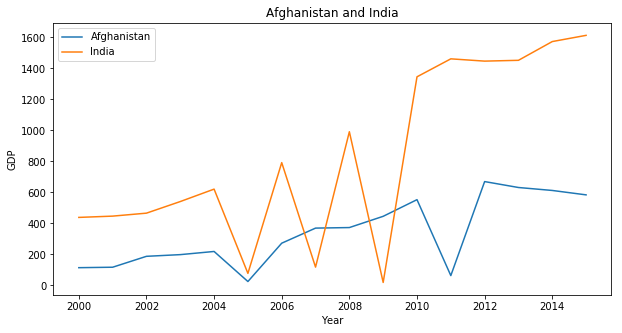

In [18]:
plt.figure(figsize=(10,5))

ax = sns.lineplot(data=df[a], x='Year', y='GDP', label='Afghanistan')
sns.lineplot(data=df[i], x='Year', y='GDP', label= 'India', ax = ax)
ax.set_title('Afghanistan and India')

## Subplots = Multiple <font color='red'>ax </font>objects

Text(0.5, 1.0, 'India')

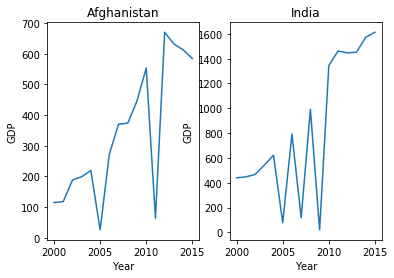

In [38]:
#gives us two ax objects 

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# ax1 
ax1 = sns.lineplot(data=df[a], x='Year', y='GDP', label='Afghanistan', legend = False, ax = ax1) 
ax1.set_title('Afghanistan')

#ax2 
ax2 = sns.lineplot(data=df[i], x='Year', y='GDP', label='India', legend = False, ax = ax2)
ax2.set_title('India')


See how theyre smushed together? We can improve them using `plt.tight_layout()` and `figsize()` in the subplots call. 

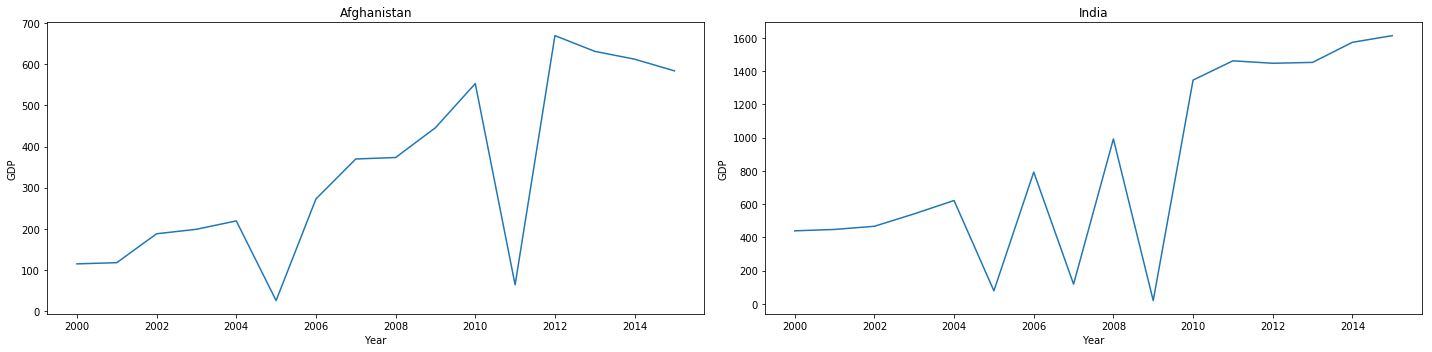

In [40]:
#gives us two ax objects 

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# ax1 
ax1 = sns.lineplot(data=df[a], x='Year', y='GDP', label='Afghanistan', legend = False, ax = ax1) 
ax1.set_title('Afghanistan')

#ax2 
ax2 = sns.lineplot(data=df[i], x='Year', y='GDP', label='India', legend = False, ax = ax2)
ax2.set_title('India')

plt.tight_layout()

## Sharing Axes

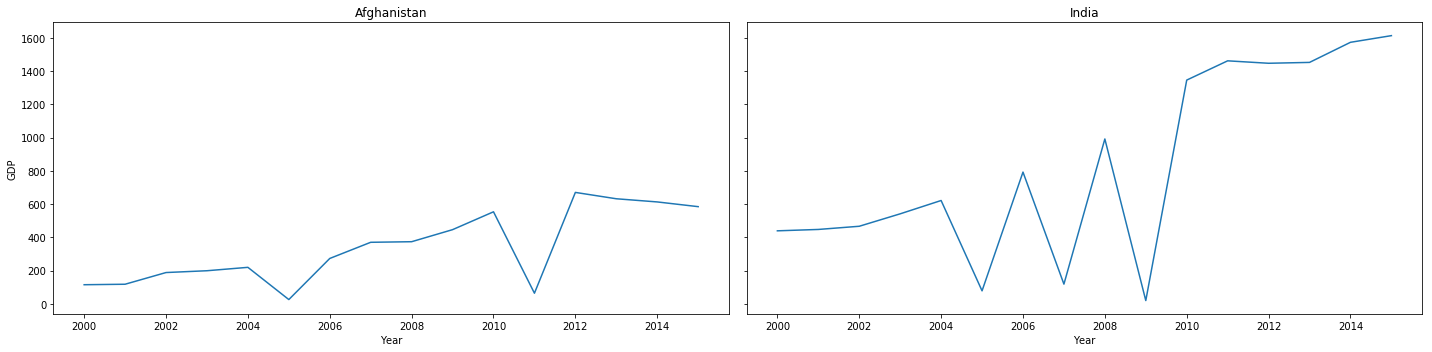

In [42]:
#gives us two ax objects 

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), sharey=True) #Can use sharex as well. 

# ax1 
ax1 = sns.lineplot(data=df[a], x='Year', y='GDP', label='Afghanistan', legend = False, ax = ax1) 
ax1.set_title('Afghanistan')

#ax2 
ax2 = sns.lineplot(data=df[i], x='Year', y='GDP', label='India', legend = False, ax = ax2)
ax2.set_title('India')

plt.tight_layout()

## `plt.subplot()` and `plt.subplots()`

Lets try achieving the same result above using `plt.subplot()`

Text(0.5, 1.0, 'India')

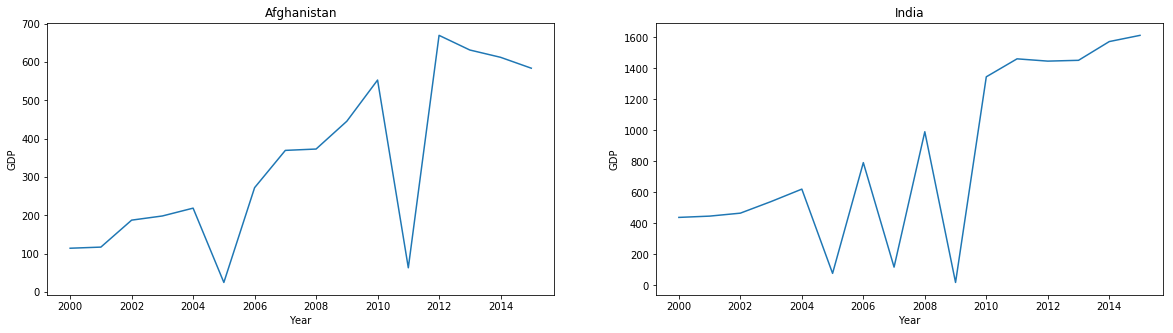

In [49]:
plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1,2,1) #notice the third counter
sns.lineplot(data=df[a], x='Year', y='GDP', label='Afghanistan', legend = False, ax = ax1)
ax1.set_title('Afghanistan')


ax2 = plt.subplot(1,2,2) #notice the third counter
sns.lineplot(data=df[i], x='Year', y='GDP', label='India', legend = False, ax = ax2)
ax2.set_title('India')

## Looping through subplots 
### (The actual meat is here)

In [51]:
len(np.unique(df.Country))

193

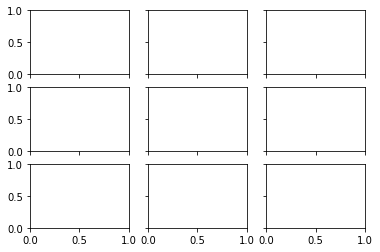

In [55]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True)

IndexError: pop from empty list

<Figure size 1440x1440 with 0 Axes>

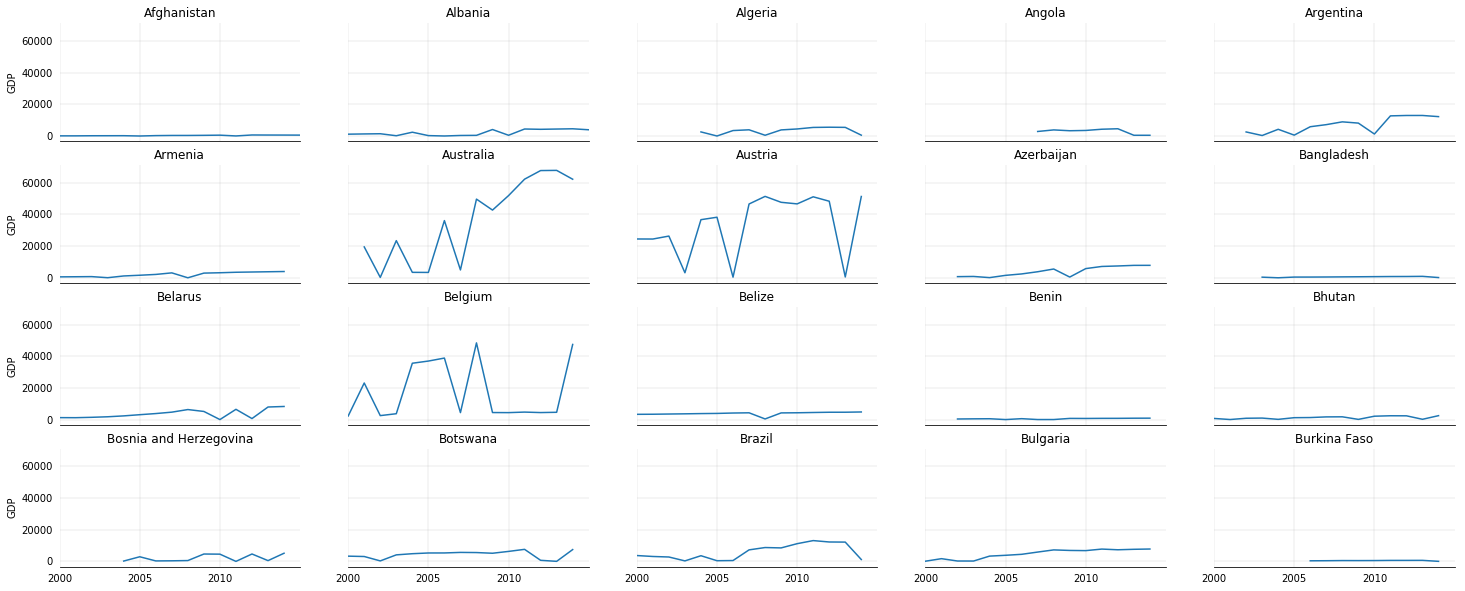

In [131]:
plt.figure(figsize=(20,20))
fig, axes = plt.subplots(nrows=4, ncols=5, sharex=True, sharey=True, figsize=(25,10))
axes_list = list(axes.flatten())# single list 

for country, country_data in df.dropna().head(1200).groupby('Country'):
    ax = axes_list.pop(0)
    sns.lineplot(x='Year', y='GDP', data= country_data,label=country, ax= ax, legend=False)
    ax.set_title(country)
    ax.tick_params(
        which='both',
        bottom=False,
        left=False,
        right=False,
        top=False
    )
    ax.grid(linewidth=0.25)
    ax.set_xlim((2000, 2015))
    ax.set_xlabel("")
    ax.set_xticks(range(2000, 2015, 5))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    
    
    
for ax in axes_list:
    ax.remove()    
    
plt.subplots_adjust(hspace=1)
    
plt.tight_layout()    
    